<a href="https://colab.research.google.com/github/AdritaBarua/Sprorts-News-Sub-categorization/blob/main/Sports_Classification(Using_Four_Categories_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Sports_csv/sports3.csv') #dataset of cricket, football, athletics and tennis

In [ ]:
len(df)

43306

# Data Cleaning


In [ ]:
pip install BnPreprocessing

In [ ]:
import BnPreprocessing as pp

df['Text'] = df['desc'].apply(lambda x: pp.remove_noise(str(x)))

In [ ]:
sentences = df['Text'].values
target = df['label'].values
map_class = dict(zip(df.label.astype("category").cat.codes,df.label))

# Feature Extraction using Tf-Idf and n-gram









In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def tokenizer(text):
    return text.split()

In [ ]:
uni_df = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(1,1), max_df = 0.06, min_df = 0.0006)
uni_bi_df = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(1,2), max_df = 0.06, min_df = 0.0006)
uni_bi_tri_df = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(1,3), max_df = 0.06, min_df = 0.0006)
bi_df = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(2,2), max_df = 0.06, min_df = 0.0006)
bi_tri_df = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(2,3), max_df = 0.06, min_df = 0.0006)
tri_df =TfidfVectorizer(tokenizer = tokenizer, ngram_range=(3,3), max_df = 0.06, min_df = 0.0006)


X_uni = uni_df.fit_transform(sentences)
X_uni_bi = uni_bi_df.fit_transform(sentences)
X_uni_bi_tri = uni_bi_tri_df.fit_transform(sentences)
X_bi = bi_df.fit_transform(sentences)
X_bi_tri = bi_tri_df.fit_transform(sentences)
X_tri = tri_df.fit_transform(sentences)

In [ ]:
f1_dict = []

In [ ]:
def get_scores(y_test, y_pred):
        from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,confusion_matrix
          # accuracy: (tp + tn) / (p + n)
        accuracy = accuracy_score(y_test, y_pred)
          # f1: 2 tp / (2 tp + fp + fn)
        f1 = f1_score(y_test, y_pred, average = None)
          # precision:  tp / (tp + fp)
        precision = precision_score(y_test, y_pred, average = None)
          # recall:  tp / (tp + fn)
        recall = recall_score(y_test, y_pred, average = None)
        confusion_matrix = confusion_matrix(y_test, y_pred)
        print('confusion_matrix:\n {}'.format(confusion_matrix))
        #print('precision: {}'.format(precision))
        #print('recall: {}'.format(recall))
        #print('fscore: {}'.format(f1))
        #print('support: {}'.format(support))          
        return 0

In [ ]:
def get_f1score(y_test, y_pred):
      from sklearn.metrics import f1_score
      f1score = {}
      list = ["Athletics","Cricket","Football","Tennis"]
      f1 = f1_score(y_test, y_pred, average = None)
      for i in range(0,4):
        f1score[list[i]] = f1[i]
      f1_dict.append(f1score)

# Classifier Models


In [ ]:
pip install mlscorer

In [ ]:
import mlscorer as ms

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def get_models(X_train, X_test, y_train, y_test):
          classifier = SVC(kernel = 'linear', random_state = 0)
          classifier.fit(X_train, y_train)
          y_pred = classifier.predict(X_test)
          print("Results for SVC model : ")
          get_scores(y_test, y_pred)
          ms.get_score_table(y_test, y_pred, map_class)
          get_f1score(y_test, y_pred)
          
          classifier = LogisticRegression(solver='lbfgs',max_iter=1000)
          classifier.fit(X_train, y_train)
          y_pred = classifier.predict(X_test)
          print("\nResults for Logistic Regression model : ")
          get_scores(y_test, y_pred)
          ms.get_score_table(y_test, y_pred, map_class)
          get_f1score(y_test, y_pred)

          classifier = DecisionTreeClassifier()
          classifier.fit(X_train, y_train)
          y_pred = classifier.predict(X_test)
          print("\nResults for Decision Tree Classifier : ")
          get_scores(y_test, y_pred)
          ms.get_score_table(y_test, y_pred, map_class)
          get_f1score(y_test, y_pred)

          classifier = MultinomialNB()
          classifier.fit(X_train, y_train)
          y_pred = classifier.predict(X_test)
          print("\nResults for MultinomialNB model : ")
          get_scores(y_test, y_pred)
          ms.get_score_table(y_test, y_pred, map_class)
          get_f1score(y_test, y_pred)

          classifier = RandomForestClassifier()
          classifier.fit(X_train, y_train)
          y_pred = classifier.predict(X_test)
          print("\nResults for Random Forest Classifier : ")
          get_scores(y_test, y_pred)
          ms.get_score_table(y_test, y_pred, map_class)
          get_f1score(y_test, y_pred)

          classifier = KNeighborsClassifier()
          classifier.fit(X_train, y_train)
          y_pred = classifier.predict(X_test)
          print("\nResults for KNN model: ")
          get_scores(y_test, y_pred)
          ms.get_score_table(y_test, y_pred, map_class)
          get_f1score(y_test, y_pred)

In [ ]:
def show_result(f1_dict,name):
          import pandas as pd

          Models= pd.DataFrame(f1_dict, index = ['SVC', 'Logistic_Regression','Decision_Tree','MultinomialNB', 'Random_Forest', 'KNN'])
          Models = Models.rename(columns = {"Athletics" : "F1 Score of Athletics(%)","Cricket" : "F1 Score of Cricket(%)", "Football" : "F1 Score of Football(%)","Tennis" : "F1 Score of Tennis(%)"})
          Models.iloc[:,0] = Models.iloc[:,0]*100
          Models.iloc[:,1] = Models.iloc[:,1]*100
          Models.iloc[:,2] = Models.iloc[:,2]*100
          Models.iloc[:,3] = Models.iloc[:,3]*100
          print("F1 Scores uning "+ name +" Feature:\n")
          display(Models) 
          
          Athletics = Models.iloc[:,0]
          Cricket = Models.iloc[:,1]
          Football = Models.iloc[:,2]
          Tennis = Models.iloc[:,3]
          
          import matplotlib.pyplot as plt
          %matplotlib inline
          import numpy as np

          fig = plt.figure(figsize = (12, 8))
          barwidth = 0.20

          r1 = np.arange(len(Athletics))
          #r2 = [x + barwidth for x in r1]
          
          plt.bar(r1-(barwidth+barwidth/2), Athletics, label="Athletics", color = 'green', width = barwidth, edgecolor = 'white')
          plt.bar(r1-barwidth/2, Tennis, label="Tennis", color = 'purple', width = barwidth, edgecolor = 'white')
          plt.bar(r1+barwidth/2, Cricket, label="Cricket", color = 'blue', width = barwidth, edgecolor = 'white')
          plt.bar(r1+(barwidth+barwidth/2), Football, label="Football", color = 'yellow', width = barwidth, edgecolor = 'white')
          
          plt.ylabel('F1_Score(%)')
          plt.xticks([r for r in range(len(Athletics))], ['SVC', 'Logistic_Regression','Decision_Tree','MultinomialNB', 'Random_Forest', 'KNN'])
          plt.title("F1 Scores using "+ name + " Feature")
          plt.legend()
          plt.show()

          f1_dict.clear()


# Models using Unigram

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_uni, target, test_size=0.20, random_state=1000)

get_models(X_train, X_test, y_train, y_test)

Results for SVC model : 
confusion_matrix:
 [[ 117   13   10    1]
 [   6 5965   68    5]
 [   6  121 2155    6]
 [   0   17    4  168]]
Accuracy: 0.9703301777880398
+-----------+--------------------+--------------------+--------------------+
|   class   |         f1         |     precision      |       recall       |
+-----------+--------------------+--------------------+--------------------+
| athletics | 0.8666666666666666 | 0.9069767441860465 | 0.8297872340425532 |
|  cricket  | 0.9810855263157895 | 0.9753106605624591 | 0.9869291859695566 |
|  football | 0.9524861878453039 | 0.9633437639696022 | 0.9418706293706294 |
|   tennis  | 0.9105691056910569 | 0.9333333333333333 | 0.8888888888888888 |
+-----------+--------------------+--------------------+--------------------+

Results for Logistic Regression model : 
confusion_matrix:
 [[ 102   28   10    1]
 [   4 5977   58    5]
 [   4  135 2144    5]
 [   0   20    8  161]]
Accuracy: 0.9679057954283076
+-----------+--------------------+-

F1 Scores uning Unigram Feature:



,F1 Score of Athletics(%),F1 Score of Cricket(%),F1 Score of Football(%),F1 Score of Tennis(%)
SVC,86.666667,98.108553,95.248619,91.056911
Logistic_Regression,81.274900,97.951491,95.119787,89.196676
Decision_Tree,69.503546,96.467279,91.373662,84.574468
MultinomialNB,83.524904,98.260081,95.608477,91.922006
Random_Forest,84.444444,97.866005,94.681779,90.425532
KNN,20.125786,81.273301,22.318167,15.533981


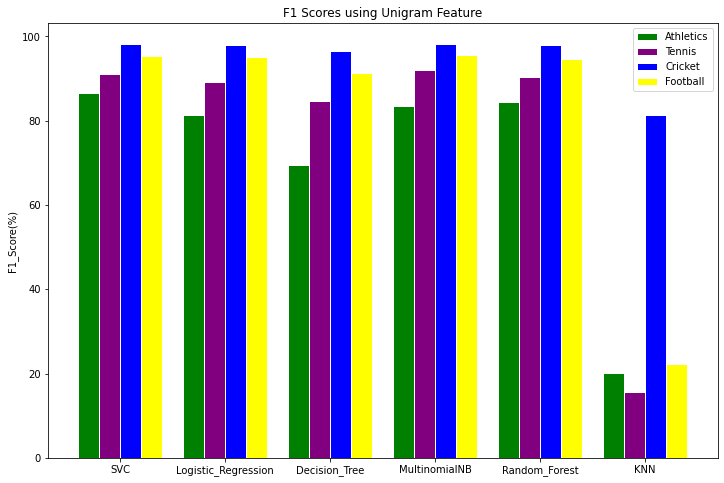

In [ ]:
name = "Unigram"
show_result(f1_dict,name)

# Models using Unigram and Bigram

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_uni_bi, target, test_size=0.20, random_state=1000)

get_models(X_train, X_test, y_train, y_test)

Results for SVC model : 
confusion_matrix:
 [[ 120   11    9    1]
 [   5 5969   66    4]
 [   6  108 2169    5]
 [   0   16    5  168]]
Accuracy: 0.9727545601477718
+-----------+--------------------+--------------------+--------------------+
|   class   |         f1         |     precision      |       recall       |
+-----------+--------------------+--------------------+--------------------+
| athletics | 0.8823529411764706 | 0.916030534351145  | 0.851063829787234  |
|  cricket  | 0.9827132038195587 | 0.9778833551769331 | 0.9875909993381866 |
|  football | 0.9561384174564691 | 0.9644286349488662 | 0.9479895104895105 |
|   tennis  | 0.9155313351498636 | 0.9438202247191011 | 0.8888888888888888 |
+-----------+--------------------+--------------------+--------------------+

Results for Logistic Regression model : 
confusion_matrix:
 [[ 102   28   10    1]
 [   3 5978   59    4]
 [   5  128 2151    4]
 [   0   20    9  160]]
Accuracy: 0.9687139228815516
+-----------+--------------------+-

F1 Scores uning Unigram-Bigram Feature:



,F1 Score of Athletics(%),F1 Score of Cricket(%),F1 Score of Football(%),F1 Score of Tennis(%)
SVC,88.235294,98.271320,95.613842,91.553134
Logistic_Regression,81.274900,98.016068,95.240204,89.385475
Decision_Tree,76.325088,96.811594,92.855582,84.832905
MultinomialNB,77.824268,98.398283,95.503675,88.184438
Random_Forest,85.818182,97.964250,94.918212,91.052632
KNN,18.064516,80.895033,17.891156,7.142857


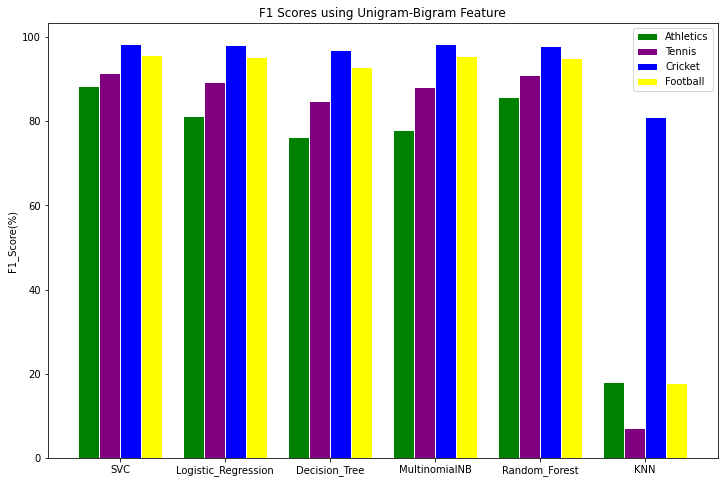

In [ ]:
name = "Unigram-Bigram"
show_result(f1_dict,name)

# Models using Unigram, Bigram & Trigram

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_uni_bi_tri, target, test_size=0.20, random_state=1000)

get_models(X_train, X_test, y_train, y_test)

Results for SVC model : 
confusion_matrix:
 [[ 120   12    8    1]
 [   5 5973   63    3]
 [   6  108 2169    5]
 [   0   16    5  168]]
Accuracy: 0.9732163472639114
+-----------+--------------------+--------------------+--------------------+
|   class   |         f1         |     precision      |       recall       |
+-----------+--------------------+--------------------+--------------------+
| athletics | 0.8823529411764706 | 0.916030534351145  | 0.851063829787234  |
|  cricket  | 0.9829671686003456 | 0.9777377639548207 | 0.9882528127068166 |
|  football | 0.9569821310390471 | 0.9661469933184855 | 0.9479895104895105 |
|   tennis  | 0.9180327868852458 | 0.9491525423728814 | 0.8888888888888888 |
+-----------+--------------------+--------------------+--------------------+

Results for Logistic Regression model : 
confusion_matrix:
 [[ 101   28   11    1]
 [   3 5979   58    4]
 [   5  127 2152    4]
 [   0   19    9  161]]
Accuracy: 0.9689448164396214
+-----------+--------------------+-

F1 Scores uning Unigram-Bigram-Trigram Feature:



,F1 Score of Athletics(%),F1 Score of Cricket(%),F1 Score of Football(%),F1 Score of Tennis(%)
SVC,88.235294,98.296717,95.698213,91.803279
Logistic_Regression,80.800000,98.040502,95.263391,89.693593
Decision_Tree,75.767918,96.808862,92.351648,84.675325
MultinomialNB,76.271186,98.404827,95.391904,87.536232
Random_Forest,85.000000,97.914943,94.888598,90.526316
KNN,18.064516,80.900322,19.543318,7.142857


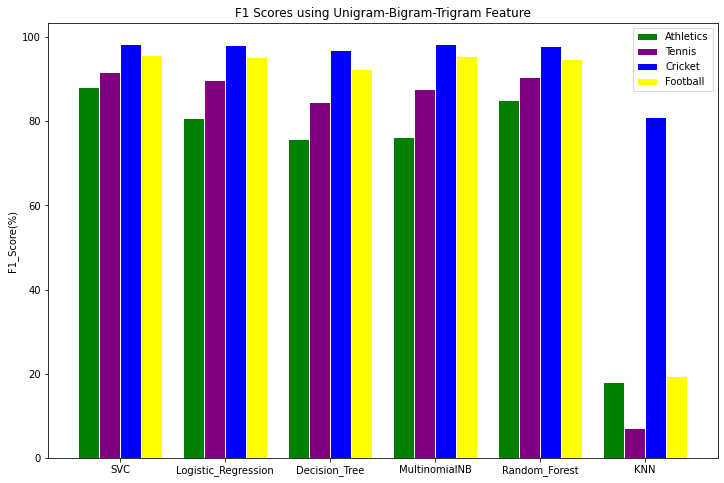

In [ ]:
name = "Unigram-Bigram-Trigram"
show_result(f1_dict,name)

# Models using Bigram

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bi, target, test_size=0.20, random_state=1000)

get_models(X_train, X_test, y_train, y_test)

Results for SVC model : 
confusion_matrix:
 [[  94   31   15    1]
 [   3 5963   72    6]
 [   8  143 2132    5]
 [   2   21    7  159]]
Accuracy: 0.9637497113830524
+-----------+--------------------+--------------------+--------------------+
|   class   |         f1         |     precision      |       recall       |
+-----------+--------------------+--------------------+--------------------+
| athletics | 0.7580645161290323 | 0.8785046728971962 | 0.6666666666666666 |
|  cricket  | 0.9773807572529094 | 0.9683338746346216 | 0.9865982792852416 |
|  football | 0.9446167478954365 | 0.9577717879604672 | 0.9318181818181818 |
|   tennis  | 0.8833333333333334 | 0.9298245614035088 | 0.8412698412698413 |
+-----------+--------------------+--------------------+--------------------+

Results for Logistic Regression model : 
confusion_matrix:
 [[  75   46   20    0]
 [   1 5977   62    4]
 [   3  147 2135    3]
 [   1   40   13  135]]
Accuracy: 0.960748095128146
+-----------+--------------------+--

F1 Scores uning Bigram Feature:



,F1 Score of Athletics(%),F1 Score of Cricket(%),F1 Score of Football(%),F1 Score of Tennis(%)
SVC,75.806452,97.738076,94.461675,88.333333
Logistic_Regression,67.873303,97.551820,94.510846,81.570997
Decision_Tree,65.949821,96.023710,90.715238,75.252525
MultinomialNB,68.493151,97.958176,94.405898,86.455331
Random_Forest,79.215686,97.382886,93.801377,86.015831
KNN,23.170732,78.514353,22.228671,5.050505


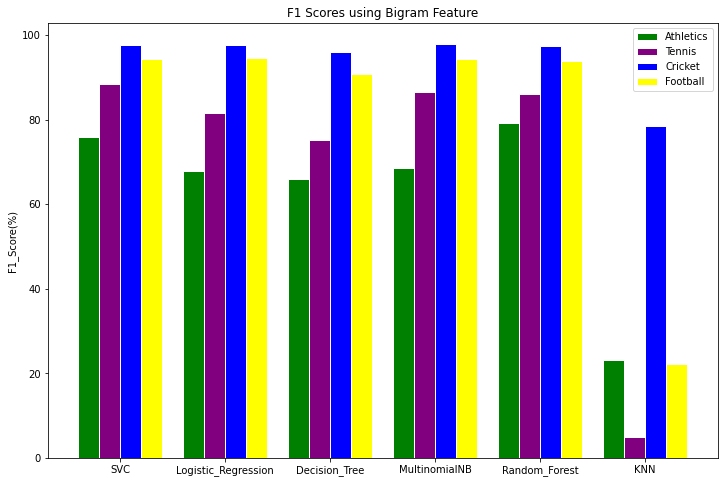

In [ ]:
name = "Bigram"
show_result(f1_dict, name)

#Models using Bigram & Trigram

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bi_tri, target, test_size=0.20, random_state=1000)

get_models(X_train, X_test, y_train, y_test)

Results for SVC model : 
confusion_matrix:
 [[  94   31   15    1]
 [   3 5962   73    6]
 [   7  141 2136    4]
 [   1   24    7  157]]
Accuracy: 0.9638651581620873
+-----------+--------------------+--------------------+--------------------+
|   class   |         f1         |     precision      |       recall       |
+-----------+--------------------+--------------------+--------------------+
| athletics | 0.7642276422764227 | 0.8952380952380953 | 0.6666666666666666 |
|  cricket  | 0.977216849696771  | 0.9681714842481325 | 0.986432825943084  |
|  football | 0.945341889798628  | 0.9574181981174361 | 0.9335664335664335 |
|   tennis  | 0.8795518207282913 | 0.9345238095238095 | 0.8306878306878307 |
+-----------+--------------------+--------------------+--------------------+

Results for Logistic Regression model : 
confusion_matrix:
 [[  75   47   19    0]
 [   1 5976   63    4]
 [   3  146 2136    3]
 [   1   38   15  135]]
Accuracy: 0.960748095128146
+-----------+--------------------+--

F1 Scores uning Bigram-Trigram Feature:



,F1 Score of Athletics(%),F1 Score of Cricket(%),F1 Score of Football(%),F1 Score of Tennis(%)
SVC,76.422764,97.721685,94.534189,87.955182
Logistic_Regression,67.873303,97.559383,94.492369,81.570997
Decision_Tree,68.656716,96.082305,90.824468,74.619289
MultinomialNB,66.046512,97.972973,94.323333,84.117647
Random_Forest,80.000000,97.417398,93.724967,86.243386
KNN,23.170732,78.580951,22.594626,6.091371


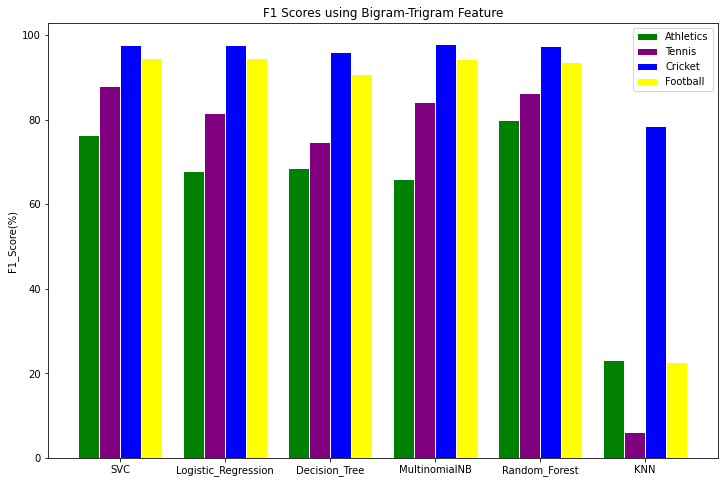

In [ ]:
name = "Bigram-Trigram"
show_result(f1_dict,name)

# Models using Trigram

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tri, target, test_size=0.20, random_state=1000)

get_models(X_train, X_test, y_train, y_test)

Results for SVC model : 
confusion_matrix:
 [[  20  108   13    0]
 [   1 5930  110    3]
 [   2  483 1797    6]
 [   1  119   20   49]]
Accuracy: 0.900023089355807
+-----------+---------------------+--------------------+---------------------+
|   class   |          f1         |     precision      |        recall       |
+-----------+---------------------+--------------------+---------------------+
| athletics | 0.24242424242424246 | 0.8333333333333334 | 0.14184397163120568 |
|  cricket  |  0.935036266162094  | 0.8930722891566265 |  0.9811383189940437 |
|  football |  0.8500473036896878 | 0.9262886597938145 |  0.7854020979020979 |
|   tennis  | 0.39676113360323884 | 0.8448275862068966 | 0.25925925925925924 |
+-----------+---------------------+--------------------+---------------------+

Results for Logistic Regression model : 
confusion_matrix:
 [[  21  108   12    0]
 [   0 5939  100    5]
 [   0  463 1819    6]
 [   1  109   25   54]]
Accuracy: 0.904294620180097
+-----------+--------

F1 Scores uning Trigram Feature:



,F1 Score of Athletics(%),F1 Score of Cricket(%),F1 Score of Football(%),F1 Score of Tennis(%)
SVC,24.242424,93.503627,85.004730,39.676113
Logistic_Regression,25.766871,93.800837,85.721018,42.519685
Decision_Tree,30.693069,92.129998,81.102546,44.599303
MultinomialNB,13.245033,93.822272,85.833720,38.174274
Random_Forest,27.956989,93.081159,83.772538,44.839858
KNN,16.201117,80.372977,61.938202,37.462236


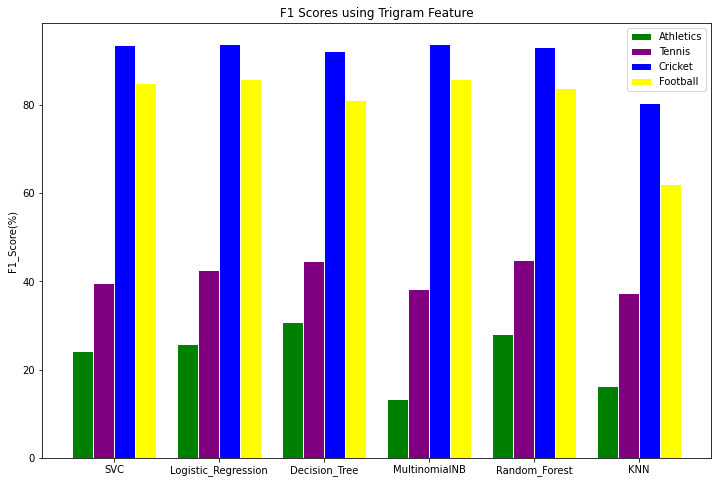

In [ ]:
name = "Trigram"
show_result(f1_dict,name)